In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import chain
from random import sample 

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3223,00015895_016.png,Effusion,16,15895,032Y,M,AP,2500,2048,0.168,0.168
2628,00013209_013.png,Pneumothorax,13,13209,074Y,F,PA,2992,2991,0.143,0.143
1518,00007920_004.png,No Finding,4,7920,057Y,M,AP,2500,2048,0.168,0.168


In [3]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [4]:
# split Finding labels column if there is more than one label and store it different column
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split("|")).tolist())))
all_labels = [x for x in all_labels if len(x) > 1]
print(f"All Labels: {all_labels}")
for label in all_labels:
    all_xray_df[label] = all_xray_df['Finding Labels'].map(lambda x: 1 if label in x else 0)
all_xray_df

All Labels: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0


Text(0, 0.5, 'Number of Images with Labels')

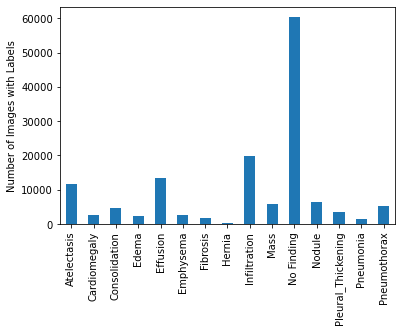

In [5]:
# Distribution of Label on the images
ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set_ylabel('Number of Images with Labels')



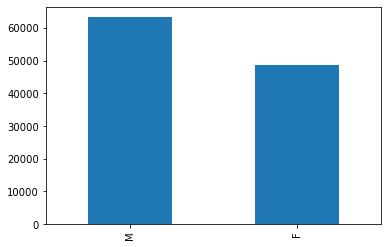

In [6]:
# patient gender distributions
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

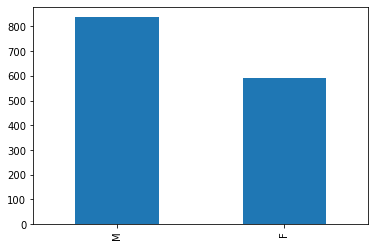

In [7]:
# patient gender with pneumonia distributions
all_xray_df[all_xray_df['Pneumonia']==1]['Patient Gender'].value_counts().plot(kind='bar')

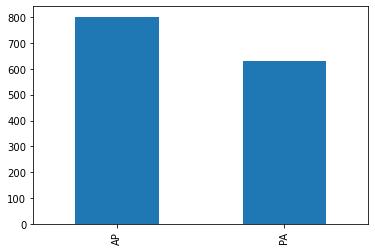

In [8]:
# Distribution of view position
all_xray_df[all_xray_df['Pneumonia']==1]['View Position'].value_counts().plot(kind='bar')

(array([615., 811.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  2.,  43.,  84., 125., 166., 207., 248., 289., 330., 371., 412.]),
 <a list of 10 Patch objects>)

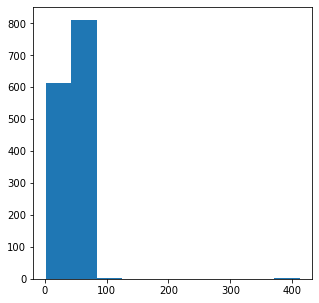

In [9]:
plt.figure(figsize=(5,5))
plt.hist(all_xray_df[all_xray_df['Pneumonia']==1]['Patient Age'])

In [10]:
print('Mean: ', np.mean(all_xray_df['Patient Age']))
print('Minimum age: ', np.min(all_xray_df['Patient Age']))
print('Max age: ', np.mean(all_xray_df['Patient Age']))



Mean:  46.90146271851587
Minimum age:  1
Max age:  46.90146271851587


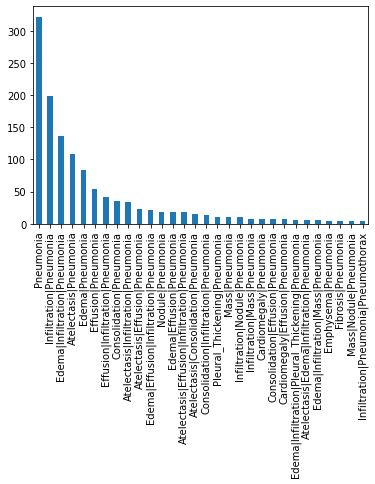

In [11]:
# Distribution of pneumonia comorbid with other diseases
all_xray_df[all_xray_df['Pneumonia']==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

Images with pneumonia:  1431
Images with non-pneumonia:  110689


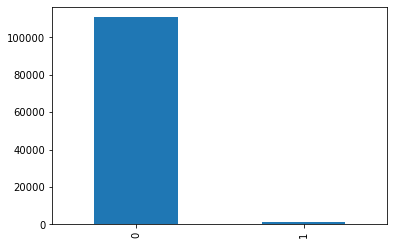

In [12]:
# Distribution of images with pneumonia and non-pneumonia labels
pneumonia = all_xray_df[all_xray_df['Pneumonia']==1]
non_pneumonia = all_xray_df[all_xray_df['Pneumonia']==0]

#plot the bar chart
all_xray_df['Pneumonia'].value_counts().plot(kind='bar')
print('Images with pneumonia: ',len(pneumonia))
print('Images with non-pneumonia: ',len(non_pneumonia))

In [13]:
# number of diseases per pitent
xray_df = all_xray_df.copy()
xray_df['No Finding'] = xray_df['No Finding'].replace(1, 0)

all_xray_df['Number_Disease'] = xray_df[all_labels].sum(axis=1)
all_xray_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Number_Disease
40950,00010607_004.png,No Finding,4,10607,59,M,AP,2500,2048,0.168000,...,0,0,0,0,1,0,0,0,0,0
95428,00025085_007.png,Pneumothorax,7,25085,24,M,AP,3056,2544,0.139000,...,0,0,0,0,0,0,0,0,1,1
4450,00001205_000.png,Infiltration,0,1205,49,F,PA,2544,3056,0.139000,...,0,0,1,0,0,0,0,0,0,1
111604,00030561_008.png,No Finding,8,30561,83,F,PA,1626,2021,0.194311,...,0,0,0,0,1,0,0,0,0,0
25984,00006829_007.png,Edema|Effusion|Fibrosis|Infiltration|Mass,7,6829,48,F,AP,2500,2048,0.168000,...,1,0,1,1,0,0,0,0,0,5


In [14]:
# create new column for image file path that correspond to image index
image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}

sample_df['path'] = sample_df['Image Index'].map(image_paths.get)

In [15]:
sample_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139000,0.139000,/data/images_001/images/00000013_005.png
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168000,0.168000,/data/images_001/images/00000013_026.png
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000,/data/images_001/images/00000017_001.png
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000,/data/images_001/images/00000030_001.png
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168000,0.168000,/data/images_001/images/00000032_001.png
...,...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,No Finding,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311,/data/images_012/images/00030712_000.png
5602,00030786_005.png,Cardiomegaly|Effusion|Emphysema,5,30786,061Y,F,AP,3056,2544,0.139000,0.139000,/data/images_012/images/00030786_005.png
5603,00030789_000.png,Infiltration,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311,/data/images_012/images/00030789_000.png
5604,00030792_000.png,No Finding,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311,/data/images_012/images/00030792_000.png


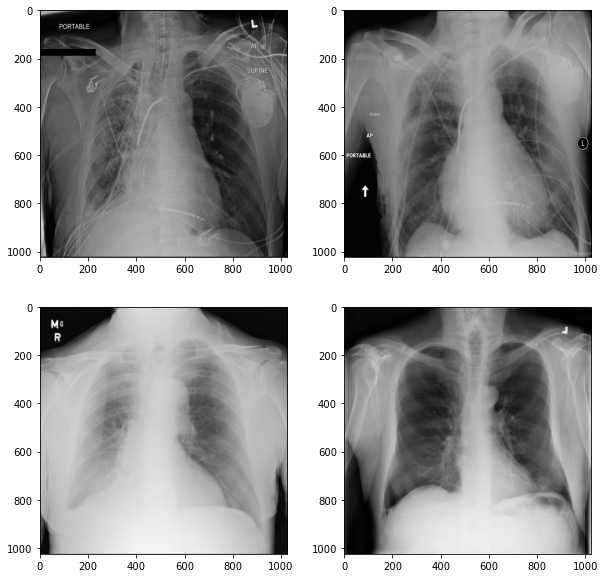

In [58]:
# plot few images
import matplotlib.image as mpimg

fig, axes = plt.subplots(2,2, figsize=(10,10))

for img_path, ax in zip(sample_df['path'], axes.flat):
    img_array = mpimg.imread(img_path)
    ax.imshow(img_array, cmap='gray')


Text(0.5, 1.0, 'Pneumonia')

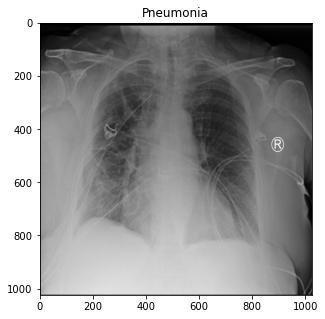

In [48]:
# Distribution of image data with pneumonia on pixel level

# create binary representation of each label in new new column
for label in all_labels:
    sample_df[label] = sample_df['Finding Labels'].map(lambda x: 1 if label in x else 0)

# image with pneumonia label
sample_pneu = sample_df[sample_df['Pneumonia']==1]
img = plt.imread(sample_pneu.loc[5366]['path'])

plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title(sample_pneu.loc[5366]['Finding Labels'])

(array([1.1404e+04, 1.3570e+03, 5.4820e+03, 4.2420e+03, 2.3130e+03,
        1.8990e+03, 1.8540e+03, 1.4750e+03, 1.3870e+03, 1.1900e+03,
        1.1750e+03, 1.0580e+03, 1.0710e+03, 1.2520e+03, 1.1790e+03,
        1.2970e+03, 1.5550e+03, 1.3590e+03, 1.3570e+03, 1.5470e+03,
        1.2570e+03, 1.1120e+03, 9.8400e+02, 1.0780e+03, 1.2060e+03,
        1.2710e+03, 1.2410e+03, 1.3040e+03, 1.3220e+03, 1.2960e+03,
        1.3560e+03, 1.5130e+03, 1.6000e+03, 1.7410e+03, 1.7500e+03,
        1.8920e+03, 1.9260e+03, 2.1030e+03, 2.4130e+03, 2.5940e+03,
        2.9290e+03, 3.1050e+03, 3.1840e+03, 3.3300e+03, 3.5780e+03,
        3.7630e+03, 3.8590e+03, 3.7380e+03, 3.7270e+03, 3.7380e+03,
        3.5960e+03, 3.6170e+03, 3.7800e+03, 3.6570e+03, 3.8370e+03,
        3.8330e+03, 3.9330e+03, 3.7610e+03, 3.7330e+03, 3.6910e+03,
        3.7470e+03, 3.7330e+03, 3.5990e+03, 3.6740e+03, 3.6250e+03,
        3.6200e+03, 3.6860e+03, 3.6870e+03, 3.8800e+03, 4.0000e+03,
        4.1540e+03, 4.2550e+03, 4.2530e+03, 4.56

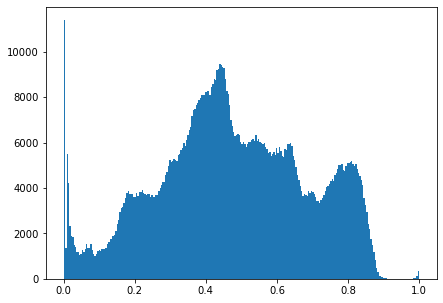

In [49]:
plt.figure(figsize=(7,5))
plt.hist(img.ravel(), bins=256)

Text(0.5, 1.0, 'No Finding')

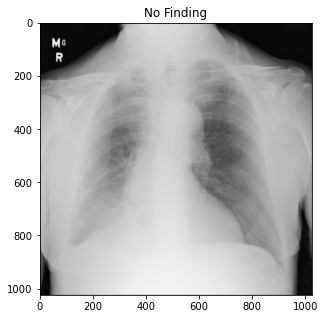

In [56]:
# image with no finding label (healthy image)
sample_nofinding = sample_df[sample_df['No Finding']==1]
img = plt.imread(sample_nofinding.iloc[0]['path'])

plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title(sample_nofinding.iloc[0]['Finding Labels'])

(array([1.0000e+00, 0.0000e+00, 1.8000e+01, 4.9000e+01, 2.3400e+02,
        8.4100e+02, 2.8850e+03, 5.9140e+03, 1.0569e+04, 2.2528e+04,
        2.5940e+04, 6.6370e+03, 1.9650e+03, 1.7910e+03, 1.6330e+03,
        0.0000e+00, 9.9300e+02, 6.3500e+02, 5.1200e+02, 3.6800e+02,
        3.4700e+02, 3.5300e+02, 3.0400e+02, 3.2400e+02, 3.4800e+02,
        3.4000e+02, 2.9700e+02, 3.2200e+02, 3.4600e+02, 3.9400e+02,
        3.6300e+02, 0.0000e+00, 3.7300e+02, 4.0600e+02, 4.4300e+02,
        4.3600e+02, 4.2100e+02, 4.8200e+02, 4.7900e+02, 4.9100e+02,
        4.4700e+02, 4.6300e+02, 5.2700e+02, 5.3400e+02, 4.7200e+02,
        5.0500e+02, 5.0700e+02, 0.0000e+00, 5.0200e+02, 4.5400e+02,
        4.6100e+02, 4.0000e+02, 4.2100e+02, 4.1700e+02, 4.0800e+02,
        3.9800e+02, 4.4300e+02, 4.4200e+02, 4.4100e+02, 4.4400e+02,
        4.3500e+02, 4.5200e+02, 3.9100e+02, 0.0000e+00, 4.3300e+02,
        3.9700e+02, 4.0900e+02, 4.2000e+02, 4.5600e+02, 4.3800e+02,
        4.9200e+02, 5.9000e+02, 5.3600e+02, 5.59

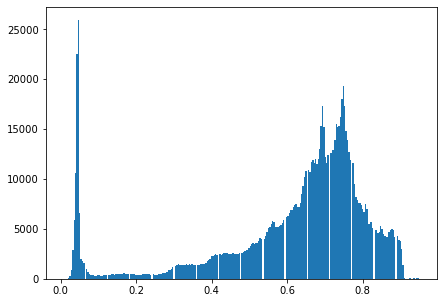

In [57]:
plt.figure(figsize=(7,5))
plt.hist(img.ravel(), bins=256)